<a href="https://colab.research.google.com/github/pumazzo/ML-ISS2025/blob/main/Lezione_1_0_ML_ISS2025_introduzione_al_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduzione al Deep Learning per le Scienze della Salute
## Lezione 1 ***Introduzione al machine learning***

In questo notebook vedremo:
- Come si importano i moduli in python
- Elementi di sintassi
  - Liste, dizionari, array, cicli, if statments
  - Salvare e caricare un file
  - Generazione numeri casuali con numpy
  - Plot di grafici


Lo scopo di questo notebook sarà di generare con numpy un dataset da usare per l'esercizio di classificazione. Approfittiamo per ricordare a tutti qualche elemento di Python. Non saremo mai troppo rigorosi.

In [ ]:
# Importiamo le librerie
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Richiamo veloce di sintassi

myint = 1 # questa è una variabile. In python non bisogna dichiara il tipo di variabile esplicitamente.
print("variable type : ", type(myint))
myfloat = 1.
print("variable type : ", type(myfloat))
mystring = "guido"
print("variable type : ", type(mystring))

variable type :  <class 'int'>
variable type :  <class 'float'>
variable type :  <class 'str'>


In [ ]:
#un insieme ordinato di elementi è una lista. Gli elementi di una lista possono anche essere di tipo diverso.
# Una lista si dichiara con le parentesi quadre
# Le variabili che abbiamo dichiarato possono essere elementi di una lista



In [ ]:
#Possiamo accedere agli elementi di una stringa usando un indice
#Gli indici devono essere numeri interi
# Il primo elemento di una lista corrisponde all' indice 0
#

print("il primo elemento della lista è :", mylist[0])

# possiamo usare una variabile come indice di una lista

print("L'elemento della lista che corrisponde all'intero contenuto nella variabile myint = {}\n è questo : mylist[myint] = {}".format(myint,mylist[myint]))

il primo elemento della lista è : 42
L'elemento della lista che corrisponde all'intero contenuto nella variabile myint = 1
 è questo : mylist[myint] = 10.0


In [ ]:
# Non possiamo usare un float come indice. La sintassi di try/except ignoratela per adesso

try:
  print(mylist[myfloat])# questo comando darà un errore e si eseguirà il contenuto di except!
except:
  print("An exception occurred. Stiamo usando un float come indice")

An exception occurred. Stiamo usando un float come indice


In [ ]:
# un esempio di operatori. Il "+"

somma = myfloat + myint
print("la somma di un intero e di un float è un float : ",somma)

la somma di un intero e di un float è un float :  2.0


In [ ]:
# il + applicato a una lista è una concatenazione
print("la mia lista concatenata ", mylist + ["a", "b"," c"])

la mia lista concatenata  [42, 10.0, 'guido', 'a', 'b', ' c']


### Adesso guardiamo la parte interessante.
- Creiamo un array con numpy
- Operazione somma con scalare
- Operazioni tra array

In [ ]:
#  Creiamo un array con numpy
# un array può essere creato a partire da una lista
myarray = np.array([1,2,3,4])
print("il mio array è = {}, type : {}".format(myarray,type(myarray)))

il mio array è = [1 2 3 4], type : <class 'numpy.ndarray'>


In [ ]:
#possiamo vedere la taglia di un array usando il comando shape
print("array shape : ",myarray.shape)
# ci dice che ci sono 4 elementi nell'array
#Si accede agli array come alle liste
print("secondo elemento dell'array : ",myarray[1])
# si può modificare il contenuto degli array
myarray[-1]=0#-1 significa ultimo elemento
print("mio array modificato = {}, type : {}".format(myarray,type(myarray)))

array shape :  (4,)
secondo elemento dell'array :  2
mio array modificato = [1 2 3 0], type : <class 'numpy.ndarray'>


In [ ]:
# possiamo definire array multidimensionali (matrici)
mymat = np.ones((4,4)) # 4 righe e 4 colonne
print("mymat \n", mymat)

mymat 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:
# sommiamo un numero a tutti gli elementi dell'array
sumWithScalar = myarray + 1
print(sumWithScalar)

[2 3 4 1]


In [ ]:
# moltiplichiamo un numero a tutti gli elementi dell'array
prodWithScalar = myarray * 2
print(prodWithScalar)

[2 4 6 0]


In [ ]:
#prodotto matrice vettore
print(mymat@myarray)


[6. 6. 6. 6.]


In [ ]:
# prodotto elemento con elemento lungo le dimenzioni uguali
print("moltiplicazione lungo le righe")
print(mymat*myarray)
print("moltiplicazione lungo le colonne")
print(mymat*myarray.reshape(-1,1))

moltiplicazione lungo le righe
[[1. 2. 3. 0.]
 [1. 2. 3. 0.]
 [1. 2. 3. 0.]
 [1. 2. 3. 0.]]
moltiplicazione lungo le colonne
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]]


In [ ]:
#concatenazione -> aggiungo un array a una matrice come riga o colonna
# expand dims crea una finta dim nell'array per permettere il corretto broadcasting
# la dim =0 sono le righe
# la dim 1 sono le colonne
np.concatenate([mymat,np.expand_dims(myarray,0)],axis=0)#sotto

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 2., 3., 0.]])

In [ ]:
np.concatenate([mymat,np.expand_dims(myarray,1)],axis=1)#a destra

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 3.],
       [1., 1., 1., 1., 0.]])

### Generiamo una matrice di numeri casuali e associamo una label
- generiamo due gaussiane in dim = 2
- creiamo il vettore di label
- facciamo un plot
- salviamo il dataset come dizionario

In [ ]:
Npoints= 1000
D = 2

mu1 = np.array([3,2])
mu2  =np.array([1,-1])
cov1 = np.array([[3, 1], [1, 2]])

d1 =  np.random.randn(Npoints, D)@ np.linalg.cholesky(cov1) + mu1
d2 = 2*np.random.randn(Npoints, D) + mu2

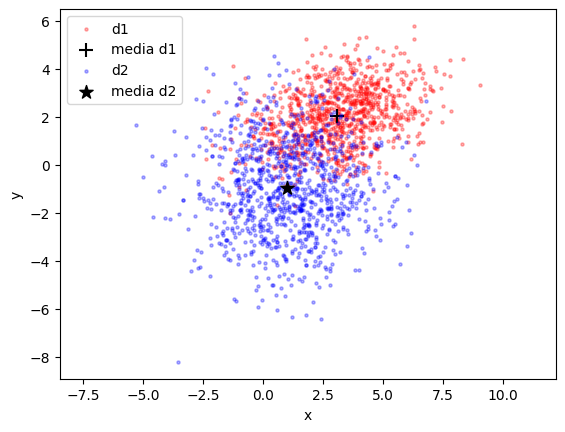

In [ ]:
f,ax = plt.subplots(1)
ax.scatter(d1[:,0],d1[:,1],s=5,alpha=0.3,color="r",label="d1")
ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="media d1")
ax.scatter(d2[:,0],d2[:,1],s=5,alpha=0.3,color="b",label="d2")
ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="media d2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis('equal')
plt.legend()

In [ ]:
data= np.concatenate([d1,d2],axis=0)
labels = np.concatenate([np.zeros(Npoints),np.ones(Npoints)],axis=0)
print(data.shape)
print(labels.shape)

(2000, 2)
(2000,)


In [ ]:
np.savez("nydata.npz",data=data,labels=labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.8666666666666667

In [ ]:
clf.coef_

array([[-0.41951519, -1.03998766]])

In [ ]:
a1,a2 = clf.coef_[0]
b = clf.intercept_
m=-a1/a2
c=-b/a2
t=np.linspace(-4,6,100)

In [ ]:
pred_class = clf.predict(X_test)

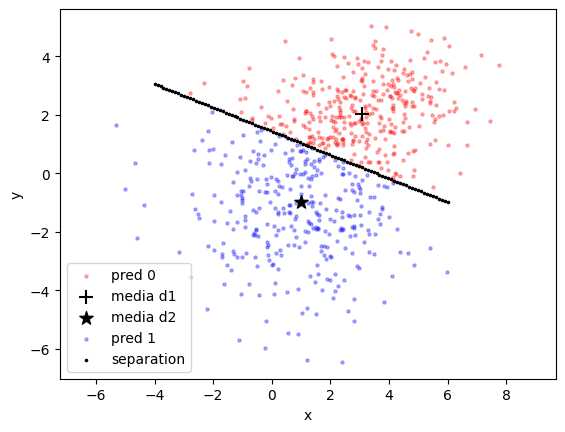

In [ ]:

f,ax = plt.subplots(1)
ax.scatter(X_test[pred_class==0,0],X_test[pred_class==0,1],s=5,alpha=0.3,color="r",label="pred 0")
ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="media d1")
ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="media d2")
ax.scatter(X_test[pred_class==1,0],X_test[pred_class==1,1],s=5,alpha=0.3,color="b",label="pred 1")
ax.scatter(t,m*t+c,s=10,alpha=1,marker=".",color="k",label="separation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis('equal')
plt.legend()



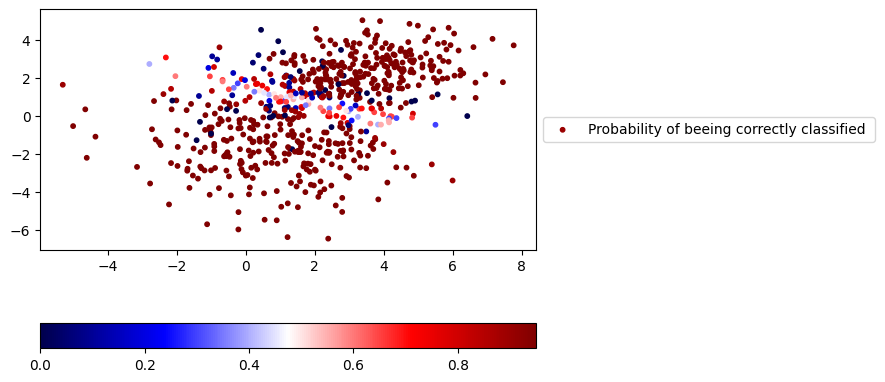

In [ ]:
pred_class = np.zeros(y_test.shape)
f,ax = plt.subplots(1)
n_fold = 20
for i  in range(n_fold-1):
  start = int(i*(Npoints/n_fold))
  stop = int((i+1)*(Npoints/n_fold))
  X_fold = X_train[start:stop,:]
  y_fold = y_train[start:stop]
  clf = LogisticRegression(random_state=0).fit(X_fold, y_fold)
  a1,a2 = clf.coef_[0]
  b = clf.intercept_
  m=-a1/a2
  c=-b/a2
  t=np.linspace(-4,6,100)
  is_correct = clf.predict(X_test) == y_test
  pred_class += is_correct

  acc=np.round(clf.score(X_test, y_test),2)
  #ax.scatter(t,m*t+c,s=10,alpha=0.2,marker=".",label="separation Fold {} - acc {}".format(i,acc))


pred_class/=n_fold
#pred_class = pred_class+1
im = ax.scatter(X_test[:,0],X_test[:,1],s=10,alpha=1,c=pred_class,label="Probability of beeing correctly classified ",cmap="seismic")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f.colorbar(im, orientation="horizontal", pad=0.2)

(array([295.,   5.,  24.,  19.,   9.,   8.,   5.,   9.,   3., 283.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

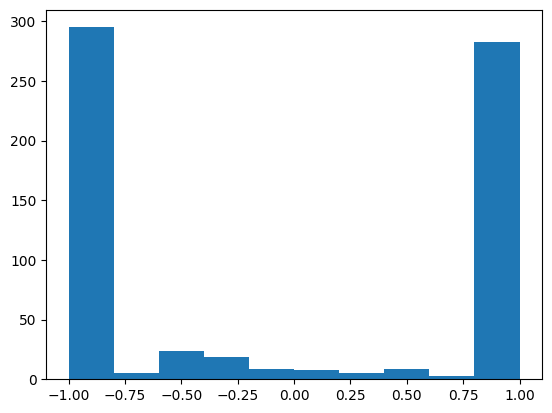

In [ ]:
plt.hist(pred_class)